In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
data = pd.read_csv('credit card.csv')
#Taking a sample
sample = data.sample(frac=0.2, random_state=42)
sample.to_csv("credit_card_sample.csv", index=False)

In [22]:
sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [23]:
sample.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
235173,148280.0,0.036640,1.143424,-1.000261,-0.117633,0.197096,-1.163842,0.476482,0.229062,-0.285240,...,0.393314,1.038177,-0.084723,-0.005014,-0.340220,-0.186001,-0.204044,-0.063468,15.71,0
75723,56223.0,-1.994348,1.503076,-0.365560,0.780223,-0.957956,0.038648,-0.453702,1.553565,-0.561964,...,0.224820,0.319275,-0.081356,-0.366704,-0.269380,-0.278170,0.082042,-0.015071,75.69,0
252263,155726.0,-0.234567,0.733694,0.486250,-0.718186,0.782227,-0.788837,1.056307,-0.175016,-0.244864,...,-0.202040,-0.574857,-0.024845,-0.428558,-0.563551,0.159926,0.094924,0.163736,9.99,0
221246,142491.0,0.040441,-0.109737,-1.266430,1.004783,2.223390,-0.670372,0.490662,-0.033739,-0.307052,...,0.341151,0.930041,0.162391,-1.180279,-1.484172,-0.619133,0.357845,0.354379,7.63,0
81910,59157.0,-0.495048,0.991481,1.671584,-0.342474,0.470012,-0.348503,0.996077,-0.351891,-0.219231,...,-0.324995,-0.474178,-0.145562,-0.011279,-0.162997,0.020511,0.040529,-0.269775,3.59,0


In [32]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56961 entries, 43428 to 81910
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56961 non-null  float64
 1   V1      56961 non-null  float64
 2   V2      56961 non-null  float64
 3   V3      56961 non-null  float64
 4   V4      56961 non-null  float64
 5   V5      56961 non-null  float64
 6   V6      56961 non-null  float64
 7   V7      56961 non-null  float64
 8   V8      56961 non-null  float64
 9   V9      56961 non-null  float64
 10  V10     56961 non-null  float64
 11  V11     56961 non-null  float64
 12  V12     56961 non-null  float64
 13  V13     56961 non-null  float64
 14  V14     56961 non-null  float64
 15  V15     56961 non-null  float64
 16  V16     56961 non-null  float64
 17  V17     56961 non-null  float64
 18  V18     56961 non-null  float64
 19  V19     56961 non-null  float64
 20  V20     56961 non-null  float64
 21  V21     56961 non-null  float64
 22 

In [33]:
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


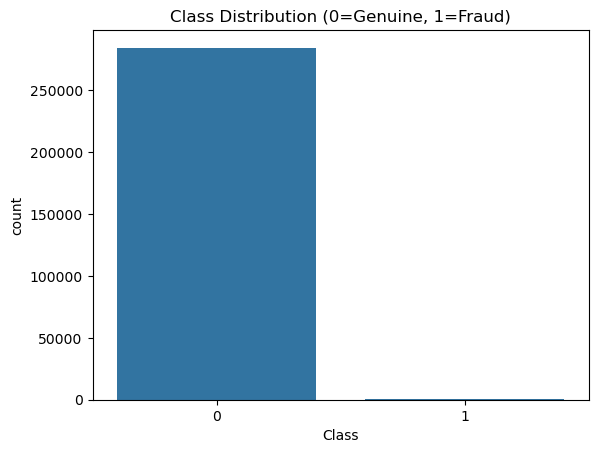

In [34]:
# Check for imbalance
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (0=Genuine, 1=Fraud)")
plt.show()


In [35]:
# Scale 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
if 'Time' in data.columns: # Drop 'Time' as it's not useful
    data = data.drop(['Time'], axis=1)
# Split features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [36]:
print(data.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [37]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9559728259621236


In [38]:
sample_frac = 0.2
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_frac, stratify=y, random_state=42)

# Split sample into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, stratify=y_sample, random_state=42)

# Train Random Forest on the smaller sample
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print performance
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11373
           1       0.94      0.85      0.89        20

    accuracy                           1.00     11393
   macro avg       0.97      0.92      0.95     11393
weighted avg       1.00      1.00      1.00     11393

ROC AUC Score: 0.9992767959201618


In [39]:
iso_forest = IsolationForest(contamination=0.001, random_state=42)
y_pred_if = iso_forest.fit_predict(X_test)

# Convert -1 (outliers) to 1 (fraud), and 1 to 0 (normal)
y_pred_if = [1 if i == -1 else 0 for i in y_pred_if]

print("Isolation Forest:")
print(classification_report(y_test, y_pred_if))

Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11373
           1       0.33      0.20      0.25        20

    accuracy                           1.00     11393
   macro avg       0.67      0.60      0.62     11393
weighted avg       1.00      1.00      1.00     11393

